### Check input files



In [21]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('../datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../datasets/train_data.csv
../datasets/firstDataset.csv


### Import train data and create DataFrame object

In [22]:
numeric_data = pd.read_csv('../datasets/firstDataset.csv')
print("The files have been imported")


The files have been imported


In [23]:
# def onlyFTP(data, featureName):
#     shortedNormal = data[data[featureName] == 'Benign']
#     shortedSSH = data[data[featureName] == 'FTP-BruteForce']
#     return pd.concat([shortedNormal, shortedSSH], axis=0)

In [24]:
# numeric_data = onlyFTP(numeric_data, 'Label')

In [25]:
numeric_data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [26]:

def makeOnlyAttackOrNot(dataToTransform):
    columnToTransform = ['Label']
    for colKey in columnToTransform:
        dataToTransform[colKey] = dataToTransform[colKey].map(
            lambda i: 0 if i == 'Benign' else 1)
        # dataToTransform[colKey] = LabelEncoder().fit_transform(dataToTransform[colKey])

    return dataToTransform


In [27]:
numeric_data = makeOnlyAttackOrNot(numeric_data)

In [28]:
numeric_data = numeric_data.drop(['Timestamp'], axis=1)

In [29]:
import numpy as np

highest_non_inf = numeric_data.max().loc[lambda v: v<np.Inf].max()

numeric_data = numeric_data.replace(np.nan, 0)
numeric_data = numeric_data.replace(np.inf, highest_non_inf)

In [30]:
labels = numeric_data['Label']

In [31]:
# numeric_data = numeric_data.drop_duplicates()

In [32]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Flow Duration      1048575 non-null  int64  
 3   Tot Fwd Pkts       1048575 non-null  int64  
 4   Tot Bwd Pkts       1048575 non-null  int64  
 5   TotLen Fwd Pkts    1048575 non-null  int64  
 6   TotLen Bwd Pkts    1048575 non-null  int64  
 7   Fwd Pkt Len Max    1048575 non-null  int64  
 8   Fwd Pkt Len Min    1048575 non-null  int64  
 9   Fwd Pkt Len Mean   1048575 non-null  float64
 10  Fwd Pkt Len Std    1048575 non-null  float64
 11  Bwd Pkt Len Max    1048575 non-null  int64  
 12  Bwd Pkt Len Min    1048575 non-null  int64  
 13  Bwd Pkt Len Mean   1048575 non-null  float64
 14  Bwd Pkt Len Std    1048575 non-null  float64
 15  Flow Byts/s        1048575 non-n

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def showHeatMap(data):
    f, ax = plt.subplots(figsize=(15, 8))
    sns.heatmap(abs(data.corr()), annot=True,
                linewidths=0.5, fmt='.2f', ax=ax)


In [34]:
columns1_30 = numeric_data[numeric_data.columns[1:31]].copy()
columns1_30['Label'] = labels.copy()

columns30_55 = numeric_data[numeric_data.columns[31:56]].copy()
columns30_55['Label'] = labels.copy()

columns55_80 = numeric_data[numeric_data.columns[56:81]].copy()
columns55_80['Label'] = labels.copy()

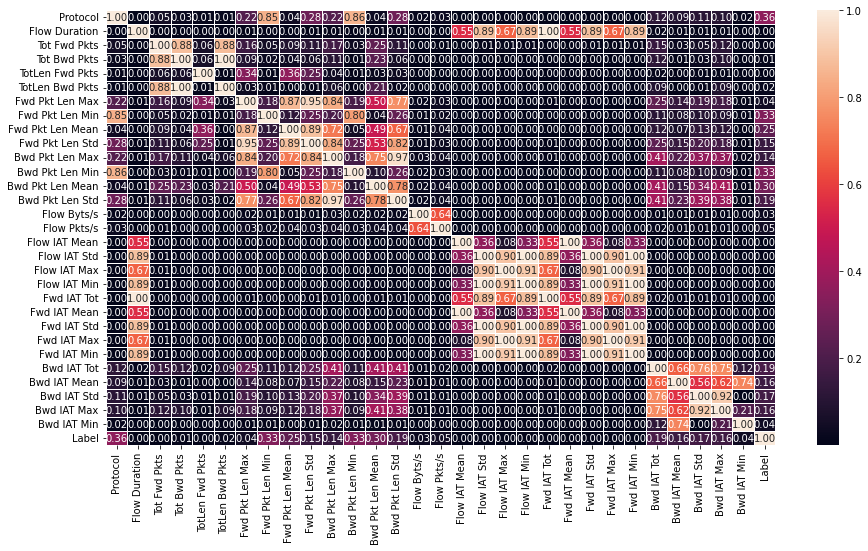

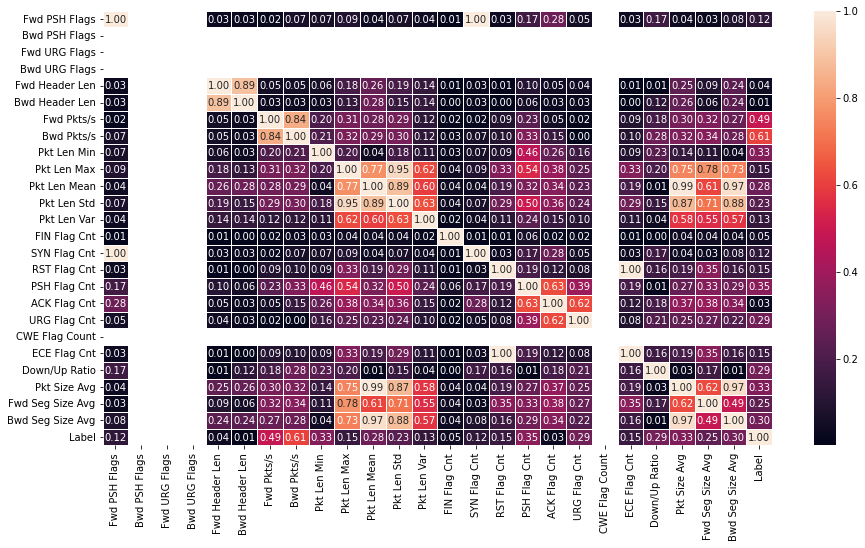

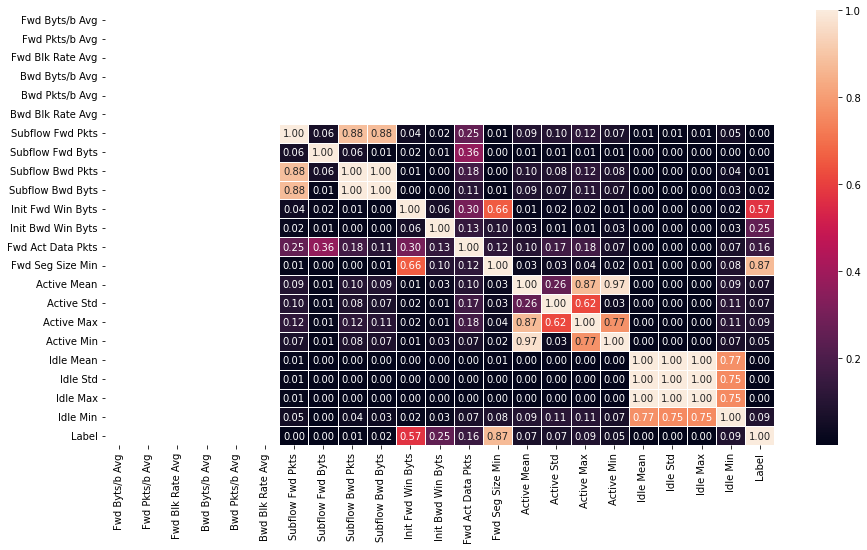

In [35]:
showHeatMap(columns1_30)
showHeatMap(columns30_55)
showHeatMap(columns55_80)


In [36]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)


def showAttackDistribution(data):
    normal = 'Benign'
    ftpAttack = 'SSH-BruteForce'
    sshAttack = 'FTP-Bruteforce'
    fig = go.Figure(data=[
        go.Bar(name=ftpAttack,
               y=data.value_counts().values[0:1],
               x=[ftpAttack],
               text=data.value_counts()[0:1],
               orientation='v',
               textposition='outside',),
        go.Bar(name=normal,
               y=data.value_counts().values[1:2],
               x=[normal],
               text=data.value_counts()[1:2],
               orientation='v',
               textposition='outside',),
        go.Bar(name=sshAttack,
               y=data.value_counts().values[2:],
               x=[sshAttack],
               text=data.value_counts()[2:],
               orientation='v',
               textposition='outside',)
    ])
    # Change the bar mode
    fig.update_layout(
        width=800,
        height=600,
        title=f'Labels Distribution',
        yaxis_title='Number of attacks',
        xaxis_title='Attack Name',)
    iplot(fig)
